# Exploration des mots

## Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
words_meta_filename = "../data/ascii/words.txt"
BASE_IMG_PATH = '../data/words'
columns= ['word_id', 'seg_res', 'gray_level', 'x', 'y', 'w', 'h', 'tag', 'transcription']

def parse_my_file(filename):
    with open(filename) as f:
        for line in f:
            if line.startswith('#'):
                continue
            yield line.strip().split(' ',len(columns) - 1)

df = pd.DataFrame(parse_my_file(words_meta_filename), columns=columns)
df.head()

,word_id,seg_res,gray_level,x,y,w,h,tag,transcription
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE
2,a01-000u-00-02,ok,154,796,764,70,50,TO,to
3,a01-000u-00-03,ok,154,919,757,166,78,VB,stop
4,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.


In [3]:
# PROPOSITION DB N PROGRESS
# Code adapté de mon premier notebook. Résout le problème avec la transcription. Mais ne fourni pas le même nombre de mots segmentés

#words_meta_filename = "../data/ascii/words.txt"
#BASE_IMG_PATH = '../data/words'

#df = pd.read_csv(words_meta_filename, sep=' ', comment='#', header = None
#                             , names = ['word_id','seg_res','gray_level','x','y','w','h','tag','transcription1','transcription2']
#                             , dtype={0:object,1:object,2:int,3:int,4:int,5:int,6:int,7:object,8:object,9:object})

#traitement des deux colonnes de transcriptions
#df['transcription2']=df['transcription2'].fillna(value='')
#df['transcription'] = df['transcription1'] + df['transcription2']
#df = df.drop(['transcription1', 'transcription2'], axis = 1)

#df.head()

In [ ]:
df.info()

In [ ]:
df['seg_res'].value_counts()

In [4]:
# COMMENTAIRE DB : PLUS BESOIN SI MA PROPOSITION EN HAUT EST RETENUE
# QUESTION : pourquoi le inplace = True ?

df['x'] = df['x'].astype(int)
df['y'] = df['y'].astype(int)
df['w'] = df['w'].astype(int)
df['h'] = df['h'].astype(int)
df['seg_res'].replace(['ok', 'err'], [1, 0], inplace=True) 
df['gray_level'] = df['gray_level'].astype(int)


In [ ]:
df['seg_res'].value_counts()

In [ ]:
df.describe()

In [ ]:
df.info()

In [5]:
#PROPOSITION DB. Ajout de résultat du nombre de mots

# A AJOUTER A LA FIN DO PREPROCESSING

print('Le dataset dispose de ' + str(df.shape[0]) +' mots scannés.')
print('Le dataset dispose de ' + str(df['seg_res'].value_counts()[1]) +' mots avec segmentation OK.')

Le dataset dispose de 115320 mots scannés.
Le dataset dispose de 96456 mots avec segmentation OK.


In [ ]:
df.head()

In [6]:
# PROPOSITION DB : enlever les index 4152 et 113621 car les fichiers semblent corrompus. Il faut faire ça pour faire tourner les celules qui vont ouvrir tous les fichiers

df = df.drop(index = [4152,113621])

## Rendering

In [7]:
# PROPOSITION DB : revenir à une échelle couleur en gris avec cmap = 'gray'

def show_img(path):
    img = plt.imread(path)
    plt.figure(figsize = (20,10))
    plt.imshow(img, cmap='gray')

def get_word_image_path_by_word_id(word_id):
    path_parts = word_id.split('-')
    return BASE_IMG_PATH + '/' + path_parts[0] + '/' + "-".join(path_parts[0:2]) + '/' + word_id+ '.png'

def show_df_image_by_word_id(word_id):
    full_path = get_word_image_path_by_word_id(word_id)
    show_img(full_path)

def get_form_img_path_by_word_id(word_id):
    path_parts = word_id.split('-')
    first_letter = path_parts[0][0].lower()
    if first_letter in ['a', 'b', 'c', 'd']:
        base_path = "../data/formsA-D/" 
    elif first_letter in ['e', 'f', 'g', 'h']:
        base_path = "../data/formsE-H/" 
    else:
        base_path = "../data/formsI-Z/" 
    return base_path + "-".join(path_parts[0:2]) + '.png'

def show_form_img_by_word_id(word_id):
    show_img(get_form_img_path_by_word_id(word_id))

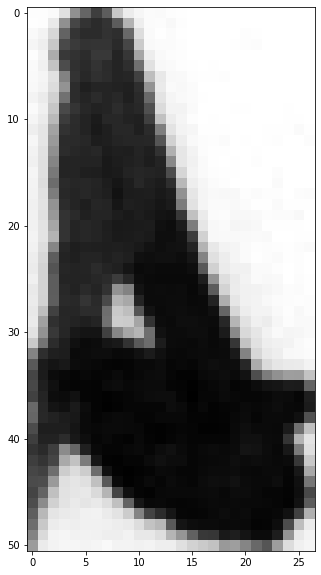

In [8]:
show_df_image_by_word_id(df.iloc[0].word_id)

In [9]:
# INVESTIGATION DES FICHIERS QUI MONTRE LES DEUX INDICES CORROMPUS
# PLUS BESOIN SI LES DEUX INDICES SONT RETIRES

#for i in range(len(df)):
#    #print(i)
#    try:
#        plt.imread(get_word_image_path_by_word_id(df.word_id.iloc[i]))
#    except:
#        print('Problème indice', str(i))

In [10]:
df.head()

,word_id,seg_res,gray_level,x,y,w,h,tag,transcription
0,a01-000u-00-00,1,154,408,768,27,51,AT,A
1,a01-000u-00-01,1,154,507,766,213,48,NN,MOVE
2,a01-000u-00-02,1,154,796,764,70,50,TO,to
3,a01-000u-00-03,1,154,919,757,166,78,VB,stop
4,a01-000u-00-04,1,154,1185,754,126,61,NPT,Mr.


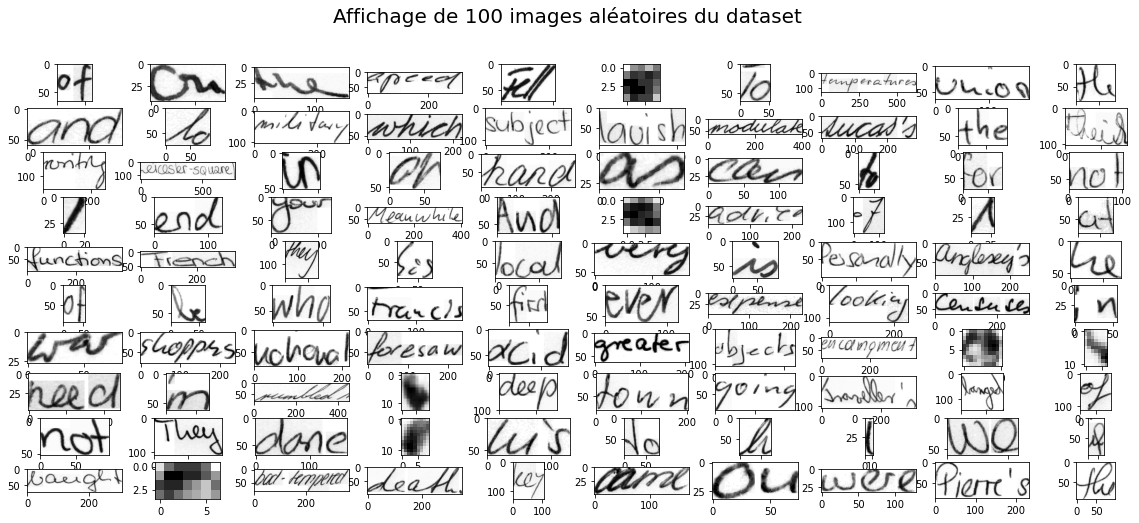

In [11]:
#PROPOSITION DB : ajouter une plot en grille des plusieurs mots pour illustrer à quoi ressemble la segmentation

#piloté par le nombre de lignes et le nombre de colonnes

n_lignes = 10
n_colonnes = 10
n_images = n_lignes * n_colonnes

# génération d'une liste d'index aléatoires
rand_list = np.sort(np.random.randint(0, df.shape[0],n_images))

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df.word_id.iloc[rand_list[i]])), cmap = 'gray') ;

fig.suptitle(t = 'Affichage de ' + str(n_images) + ' images aléatoires du dataset', fontsize = 20);

Cet affichage est intéressant pour avoir une vision globale sur les données disponibles.
On y découvre des mots bien définis et d'autres mots avec très peu de pixels et pas très reconnaissables. On peut se poser la question s'ils seraient utiles pour entrainer un réseau de reconnaissance.


### Analyse des gray_level

#### /!\ : le gray_level correspond au gray_level de la ligne scannée et pas celui du mot

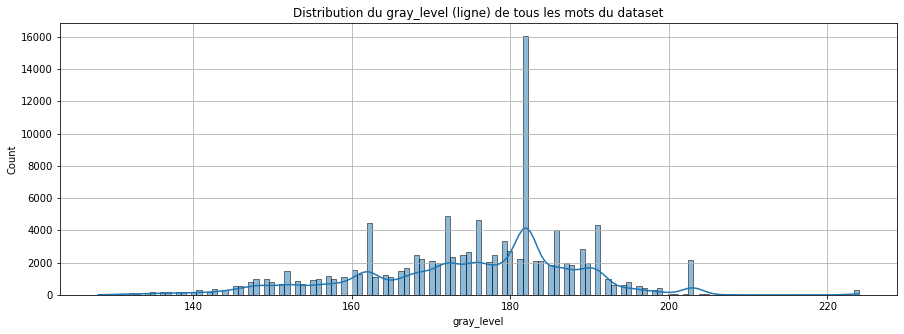

In [12]:
#PROPOSITION DB : analyse de la distribution du gray_level ligne

plt.figure(figsize = (15,5))
sns.histplot(data = df, x= 'gray_level', kde = True)
plt.title('Distribution du gray_level (ligne) de tous les mots du dataset')
plt.grid()

L'histogramme de distribution des gray_level des lignes affiche un pic au gray_level de 182. 

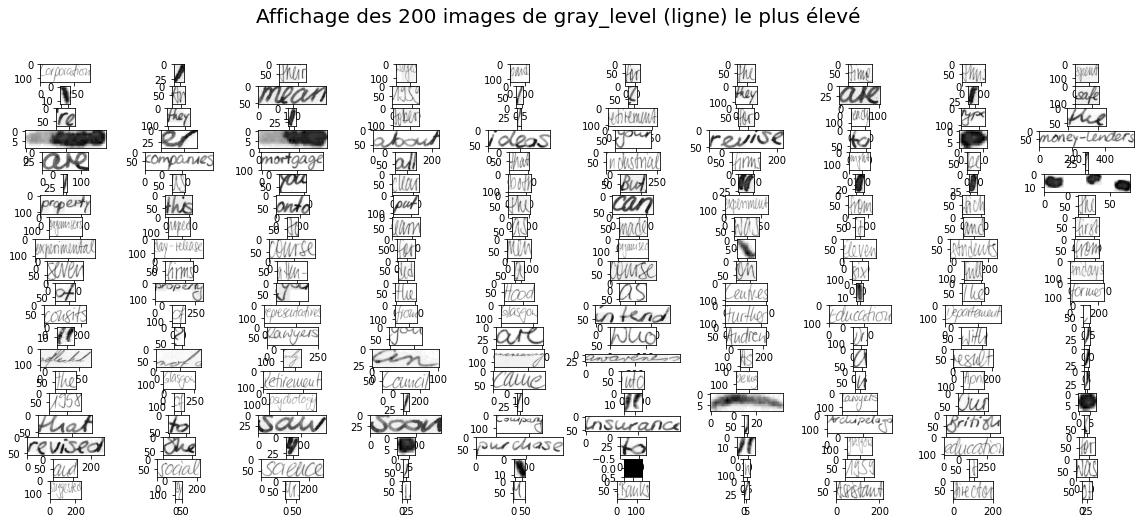

In [13]:
#PROPOSITION DB : analyse des images de gray_level des lignes plus élevé

#piloté par le nombre de lignes et le nombre de colonnes

n_lignes = 20
n_colonnes = 10
n_images = n_lignes * n_colonnes

df_temp = df[df.seg_res==1].sort_values(by='gray_level', ascending = False, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de gray_level (ligne) le plus élevé', fontsize = 20);

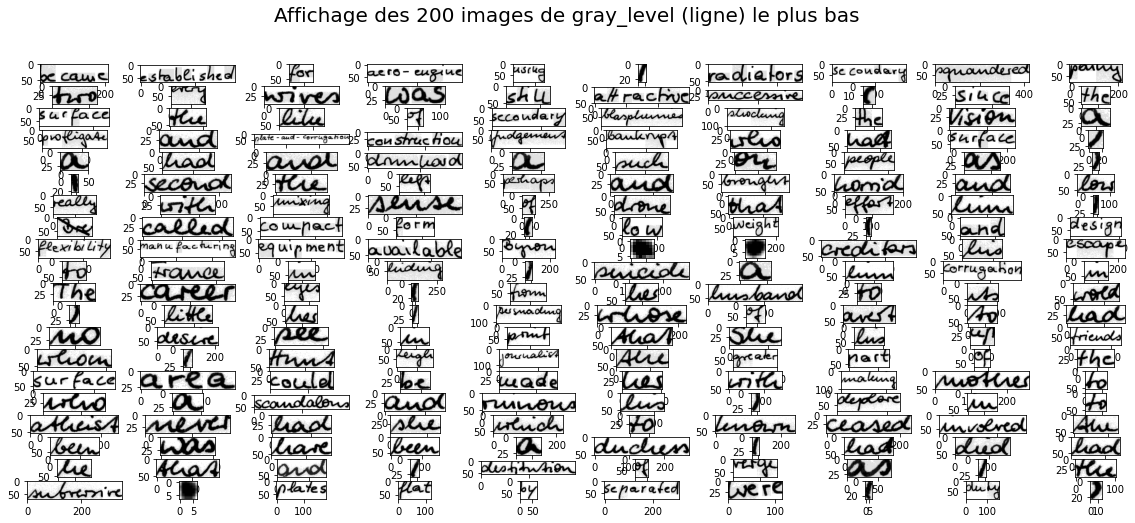

In [14]:
#PROPOSITION DB : analyse des images de gray_level des lignes plus bas

#piloté par le nombre de lignes et le nombre de colonnes

n_lignes = 20
n_colonnes = 10
n_images = n_lignes * n_colonnes

df_temp = df[df.seg_res==1].sort_values(by='gray_level', ascending = True, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de gray_level (ligne) le plus bas', fontsize = 20);

Globalement, un gray_level de ligne élevé correspond à une écriture plus claire et vice-versa.
Maintenant, il peut être intéressant de calculer manuelement le gray_level par mot et de regarder à quoi ressemblent les mots les plus claires et les plus sombres.

La moyenne gray_scale est de : 0.80402523


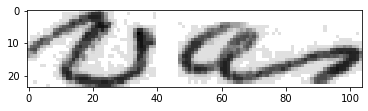

In [15]:
# CELLULE DE TRAVAIL
# Afficheage d'un mot aléatoire et de son niveau de gris

rand_index = np.random.randint(0, df.shape[0],1)

image = plt.imread(get_word_image_path_by_word_id(df.word_id.iloc[rand_index[0]]))  
plt.imshow(image, cmap='gray')

print('La moyenne gray_scale est de :', str(image.mean()))


In [16]:
%%time
# PROPOSITION DB EN : creation d'un colonne dans df avec le grayscale (moyenne de l'image). Attention au temps d'éxecution
# Je profite pour partager l'astuce : ajouter %%time en haut de la cellule donne le temps d'exécution

def get_img_mean(id):
    image = plt.imread(get_word_image_path_by_word_id(id))
    return image.mean()

df['gray_level_mot'] = df.word_id.apply(get_img_mean)


CPU times: user 1min 32s, sys: 27.7 s, total: 2min
Wall time: 3min 4s


Text(0, 2500, '0 représente noir\n1 représente blanc')

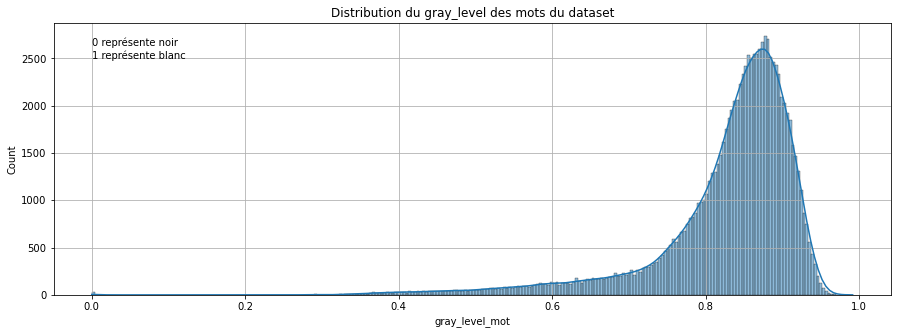

In [17]:
plt.figure(figsize = (15,5))
sns.histplot(data = df[df.seg_res==1], x= 'gray_level_mot', kde = True)
plt.title('Distribution du gray_level des mots du dataset')
plt.grid()
plt.text(0,2500,'0 représente noir\n1 représente blanc')

In [18]:
from scipy.stats import pearsonr

pearsonr(df.gray_level, df.gray_level_mot)

(0.3098307189504118, 0.0)

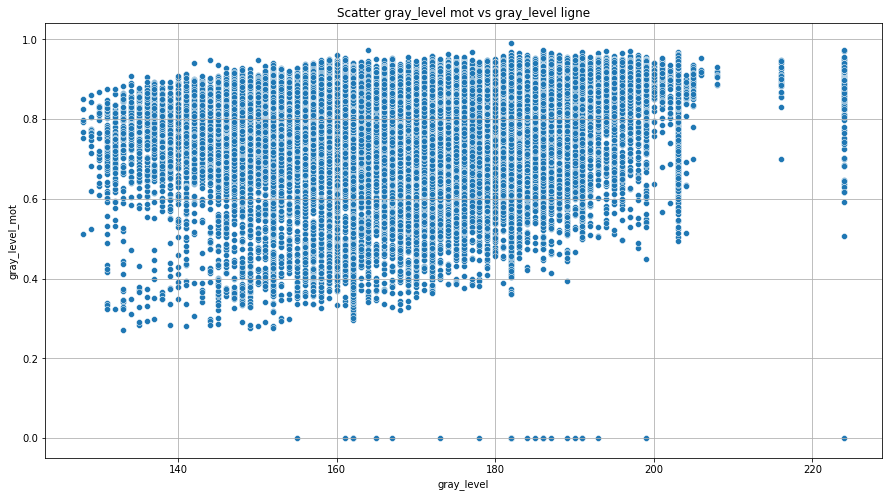

In [19]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=df[df['seg_res']==1], x='gray_level', y='gray_level_mot')
plt.title('Scatter gray_level mot vs gray_level ligne')
plt.grid()


J'en déduis qu'il n'y a pas de corrélation forte entre le gray_level du mot et le gray_level de la ligne.
On observe aussi un certain nombre de mots qui on un gray level égale à 0.

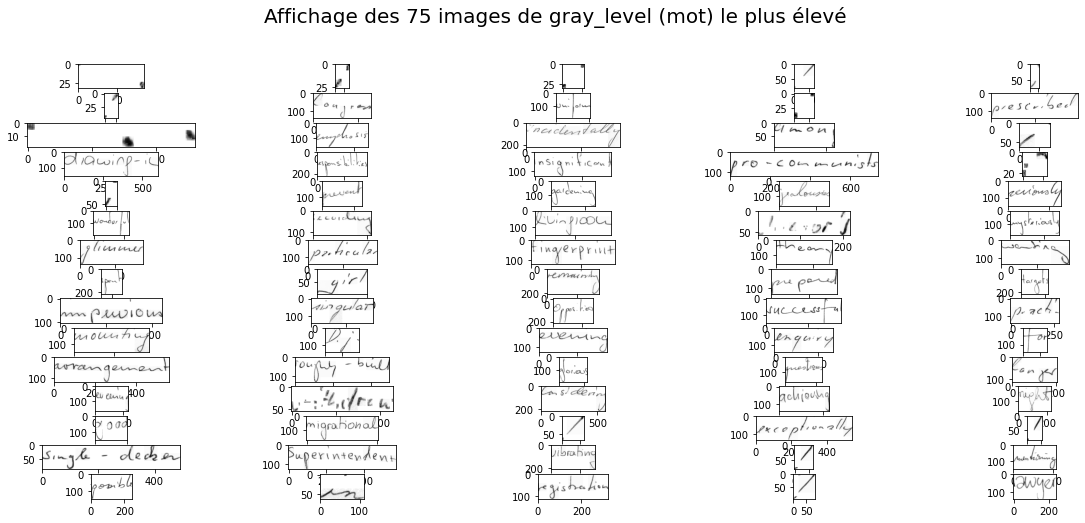

In [20]:
#PROPOSITION DB : analyse des images avec le gray_new le plus élevé. Avec filtre seg_res ==1.

#piloté par le nombre de lignes et le nombre de colonnes

n_lignes = 15
n_colonnes = 5
n_images = n_lignes * n_colonnes

df_temp = df[df['seg_res']==1].sort_values(by='gray_level_mot', ascending = False, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de gray_level (mot) le plus élevé', fontsize = 20);

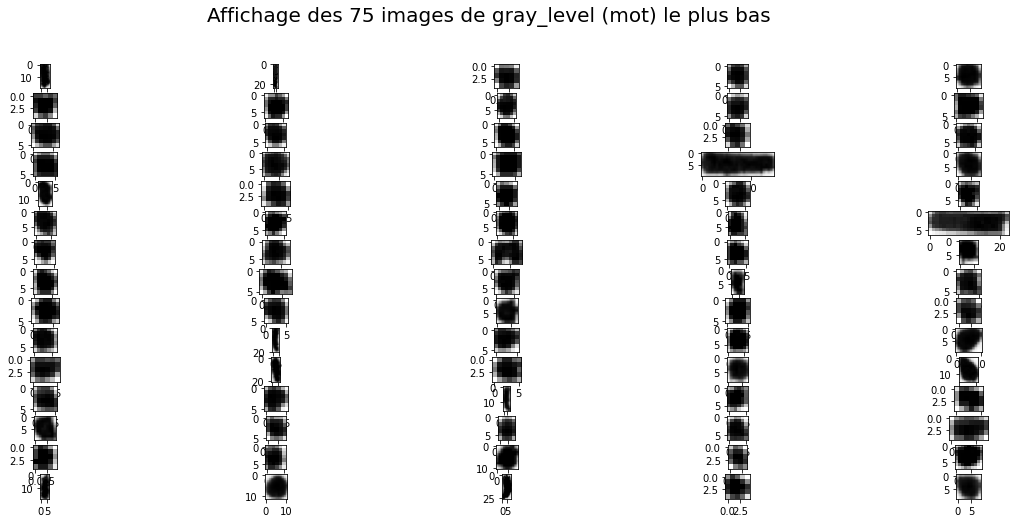

In [21]:
#PROPOSITION DB : analyse des images avec le gray_new le plus bas. Avec filtre seg_res ==1.

#piloté par le nombre de lignes et le nombre de colonnes

n_lignes = 15
n_colonnes = 5
n_images = n_lignes * n_colonnes

df_temp = df[(df['seg_res']==1) & (df['gray_level_mot']>0)].sort_values(by='gray_level_mot', ascending = True, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de gray_level (mot) le plus bas', fontsize = 20);

In [22]:
df[df['gray_level_mot']<.5].shape 

(1836, 10)

Il y a 1836 mots avec un gray scale inférieur à 0.5 (très sombre). L'utilité de ces mots pour l'apprentissage peut être discutée

### Analyse de la taille des bounding box

''

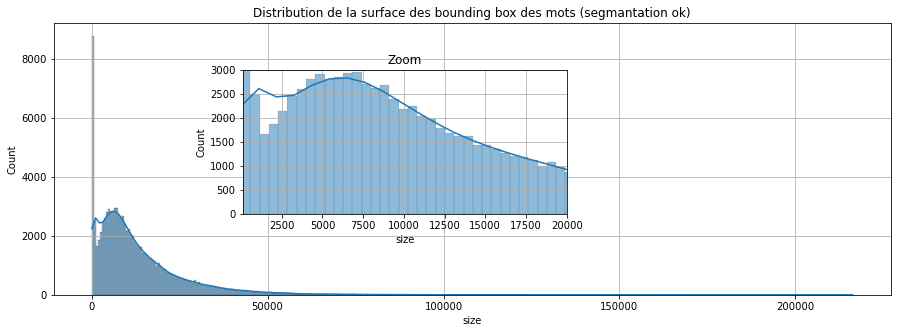

In [23]:
df['size'] = df.h * df.w

plt.figure(figsize = (15,5))
sns.histplot(data = df[df.seg_res==1], x= 'size', kde = True)
plt.title('Distribution de la surface des bounding box des mots (segmantation ok)')
plt.grid()

a = plt.axes([.3, .35, .3, .4])
sns.histplot(data = df[df.seg_res==1], x= 'size', kde = True)
plt.title('Zoom')
plt.xlim((100,20000))
plt.ylim((0,3000))
plt.grid()
;

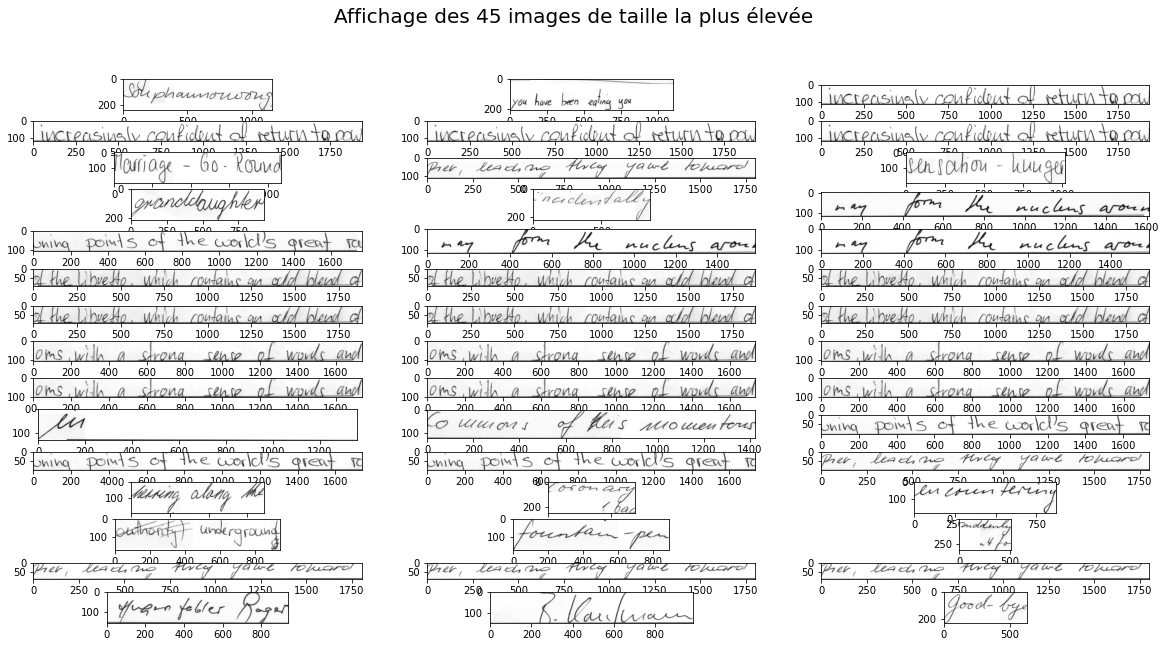

In [24]:
#PROPOSITION DB : analyse des images de taille la plus élevée

#piloté par le nombre de lignes et le nombre de colonnes

df['size'] = df.h * df.w

n_lignes = 15
n_colonnes = 3
n_images = n_lignes * n_colonnes

df_temp = df.sort_values(by='size', ascending = False, ignore_index=True)

fig = plt.figure(figsize = (20,10))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de taille la plus élevée', fontsize = 20);

Ce résultat montre qu'il y a des mots mal segmentés. Besoin de trier uniquement sur les mots avec seg_res == 1.

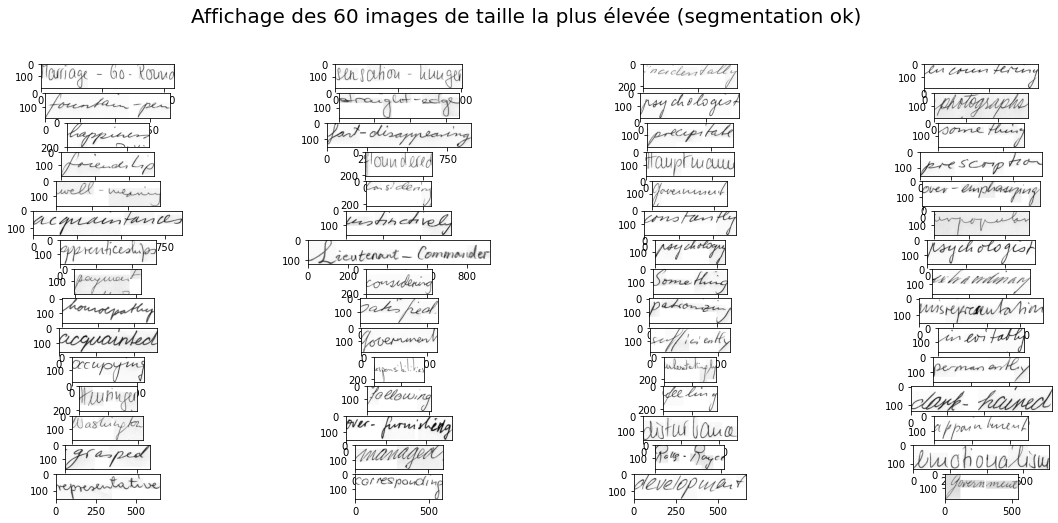

In [25]:
#PROPOSITION DB : analyse des images de taille la plus élevée. Avec filtre seg_res ==1.

#piloté par le nombre de lignes et le nombre de colonnes

df['size'] = df.h * df.w

n_lignes = 15
n_colonnes = 4
n_images = n_lignes * n_colonnes

df_temp = df[df['seg_res']==1].sort_values(by='size', ascending = False, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de taille la plus élevée (segmentation ok)', fontsize = 20);

Ce qu'on constate avec ce dépouillement c'une prédisposition pour un style d'écrite italique

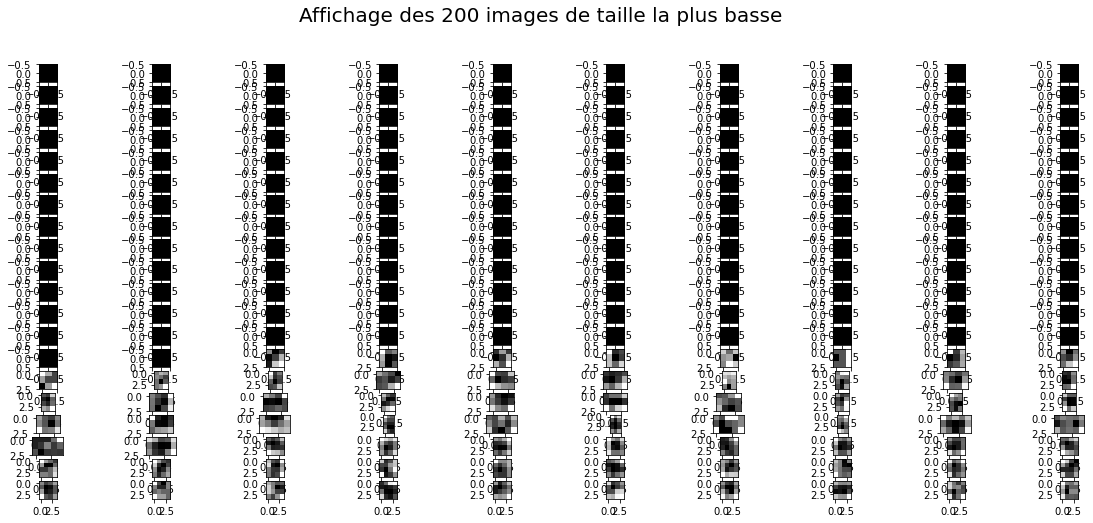

In [26]:
#PROPOSITION DB : analyse des images de taille la plus petite. 

#piloté par le nombre de lignes et le nombre de colonnes

df['size'] = df.h * df.w

n_lignes = 20
n_colonnes = 10
n_images = n_lignes * n_colonnes

df_temp = df.sort_values(by='size', ascending = True, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de taille la plus basse', fontsize = 20);

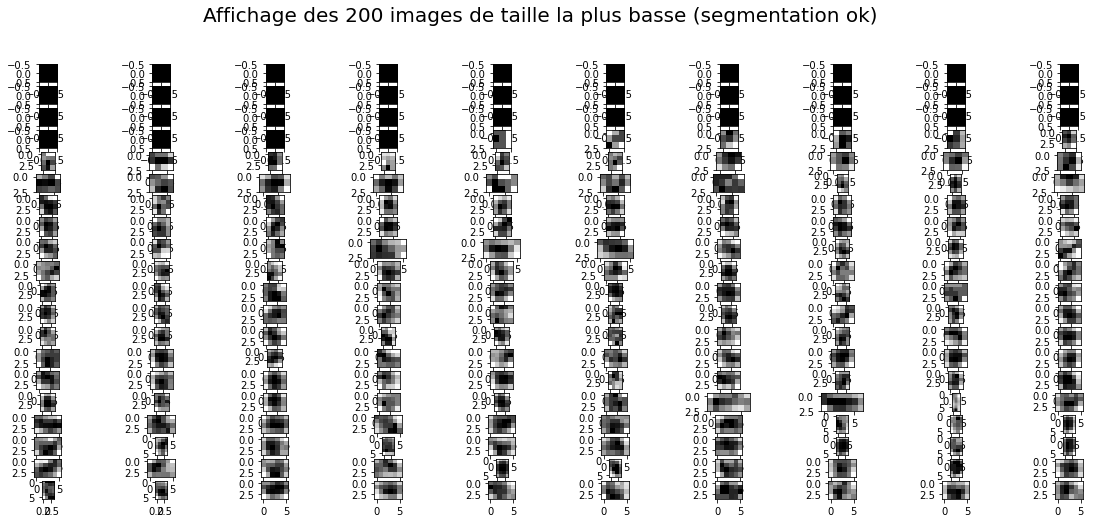

In [27]:
#PROPOSITION DB : analyse des images de taille la plus petite. Avec filtre seg_res ==1.

#piloté par le nombre de lignes et le nombre de colonnes

df['size'] = df.h * df.w

n_lignes = 20
n_colonnes = 10
n_images = n_lignes * n_colonnes

df_temp = df[df['seg_res']==1].sort_values(by='size', ascending = True, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de taille la plus basse (segmentation ok)', fontsize = 20);

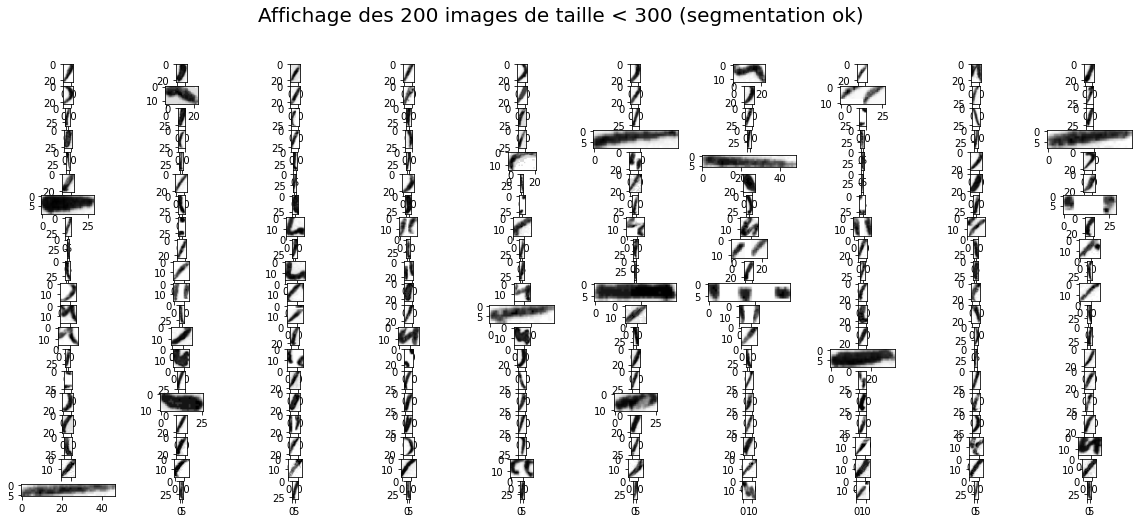

In [28]:
#PROPOSITION DB : analyse des images de taille < seuil. Avec filtre seg_res ==1.

#piloté par le nombre de lignes et le nombre de colonnes

df['size'] = df.h * df.w

n_lignes = 20
n_colonnes = 10
n_images = n_lignes * n_colonnes
taille_seuil = 300

df_temp = df[(df['seg_res']==1) & (df['size']< taille_seuil)].sort_values(by='size', ascending = False, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de taille < ' + str(taille_seuil) + ' (segmentation ok)', fontsize = 20);

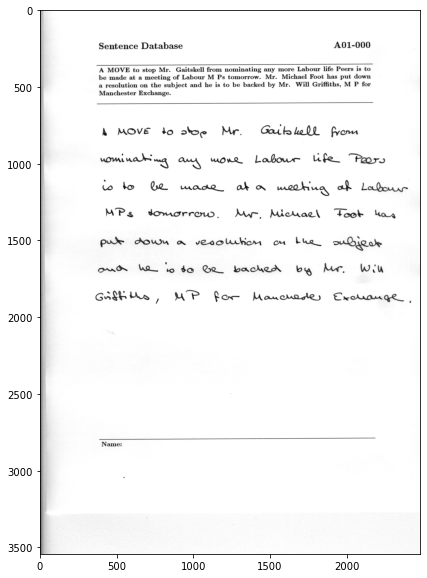

In [29]:
show_form_img_by_word_id(df.iloc[0].word_id)

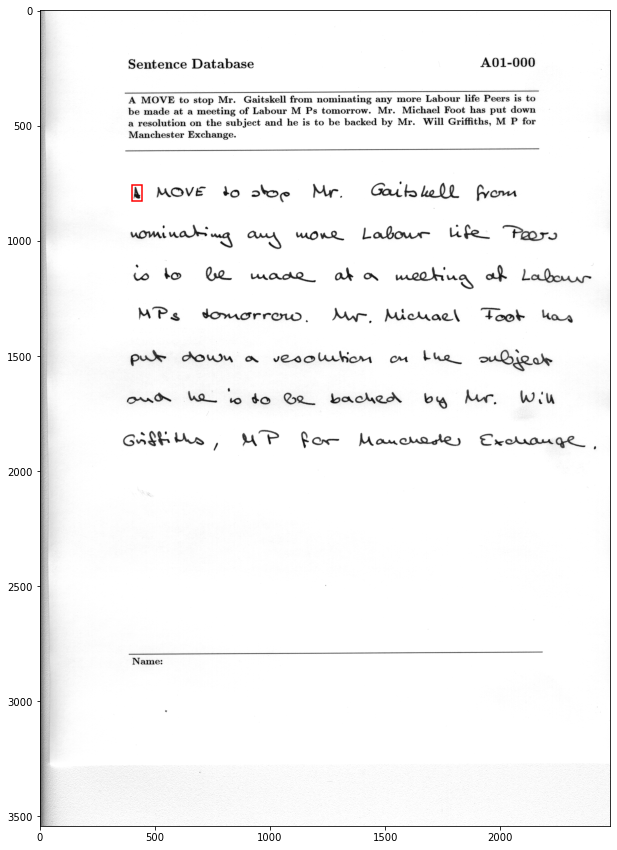

In [30]:
# PROPOSITION DB : 
# quelques ajustements de mise en forme : revenir au form en gris, mettre la bounding box en rouge, un peu pus épaisse et plus large pour ne pas superposer le mot

def plot_bounding_box(line):
    form_img_path = get_form_img_path_by_word_id(line.word_id)
    img = plt.imread(form_img_path)

    fig, ax = plt.subplots(figsize=(20,15))
    fig.figsize=(20,10)
    ax.imshow(img, cmap='gray')

    ax.add_patch(
        patches.Rectangle(
            (line.x-8, line.y-8),
            line.w+16,
            line.h+16,
            fill=False,
            color = 'red',
            linewidth=1.5
        ) ) 
    plt.show()

plot_bounding_box(df.iloc[0])

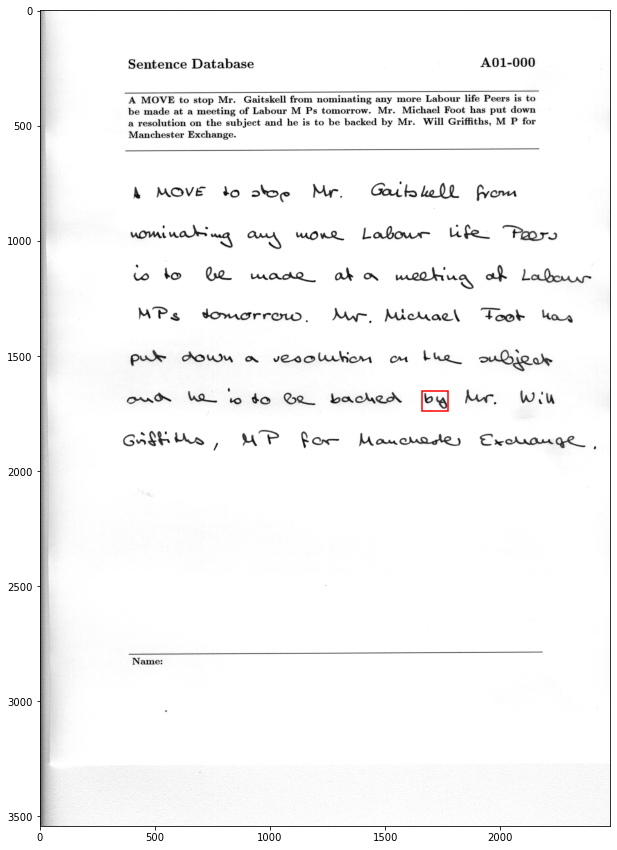

In [31]:
plot_bounding_box(df.iloc[42])

## Répartition des lettres dans le corpus

In [32]:

corpus = "".join([trans.lower() for trans in df['transcription']])

def get_letter_frequency_dict(text):
    dic = {}
    for l in text:
        if l in dic:
            dic[l] += 1
        else:
            dic[l] = 1
    return dic

freq_dict = get_letter_frequency_dict(corpus)
print(freq_dict)


{'a': 37106, 'm': 11785, 'o': 33810, 'v': 4699, 'e': 57584, 't': 41624, 's': 28931, 'p': 8974, 'r': 28121, '.': 6224, 'g': 9314, 'i': 31900, 'k': 2982, 'l': 18672, 'f': 10495, 'n': 31738, 'y': 8491, 'b': 7657, 'u': 12392, 'd': 18521, ' ': 49, 'w': 9535, 'c': 12573, 'h': 26232, 'j': 604, ',': 5629, 'x': 793, '0': 431, '-': 1545, "'": 1987, '"': 1629, '1': 494, '9': 179, '5': 157, '8': 118, '3': 174, '#': 79, 'q': 386, '(': 203, '2': 209, ')': 200, '4': 118, ':': 165, '7': 64, ';': 204, '6': 121, 'z': 215, '?': 259, '*': 14, '!': 226, '/': 16, '&': 55, '+': 9}


In [33]:
keys = list(freq_dict.keys())
values = list(freq_dict.values())
sorted_indexes = np.argsort(keys)
labels = []
counts = []
for index in sorted_indexes:
    labels.append(keys[index])
    counts.append(values[index])

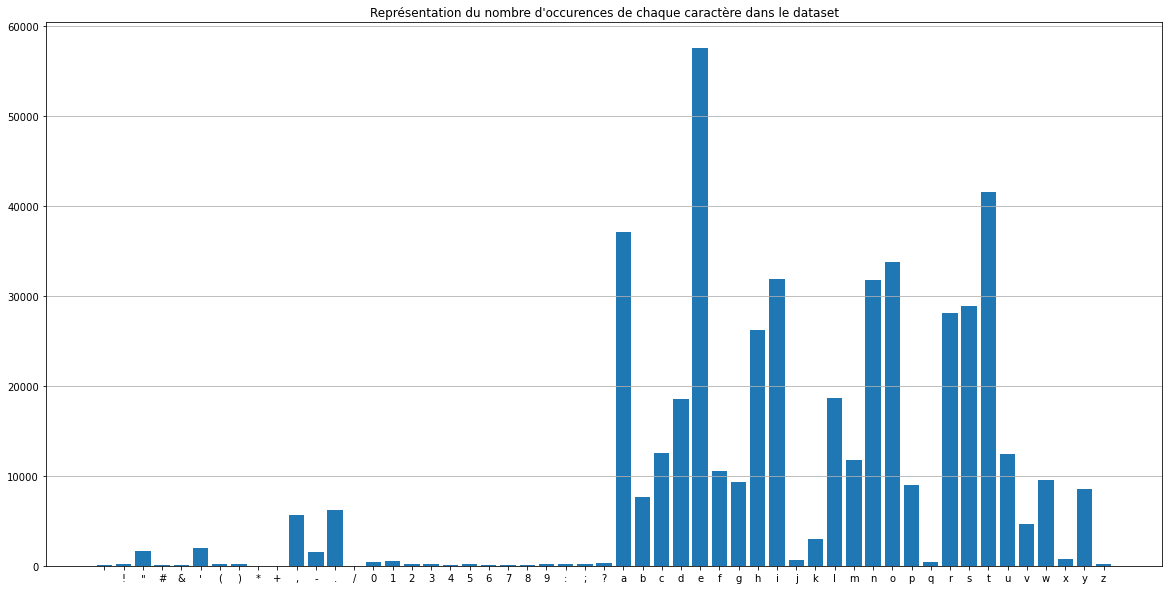

In [34]:
#PROPOSITION DB : ajouter la grille horizontal pour la lecture 

plt.figure(figsize=(20,10))
plt.title("Représentation du nombre d'occurences de chaque caractère dans le dataset")
plt.bar(labels, counts)
plt.grid(axis='y')
plt.show()


In [35]:
print("La lettre 'k' est représentée seulement", freq_dict['k'], "dans le corpus")
print("Tandis que la lettre 'e' est représentée", freq_dict['e'], "dans le corpus")

La lettre 'k' est représentée seulement 2982 dans le corpus
Tandis que la lettre 'e' est représentée 57584 dans le corpus


Nous pouvons observer une grosse disparité dans les représentations de chacune des lettres.
Les lettres 'j', 'k', 'q', 'x' et 'z' notamment sont très peu représentées. 

A l'inverse, les lettres 'e', 'a' et 't' sont très présentes. 



In [36]:
# TRAVAIL 

alphabet_start = labels.index('a')

alphabet_start

27

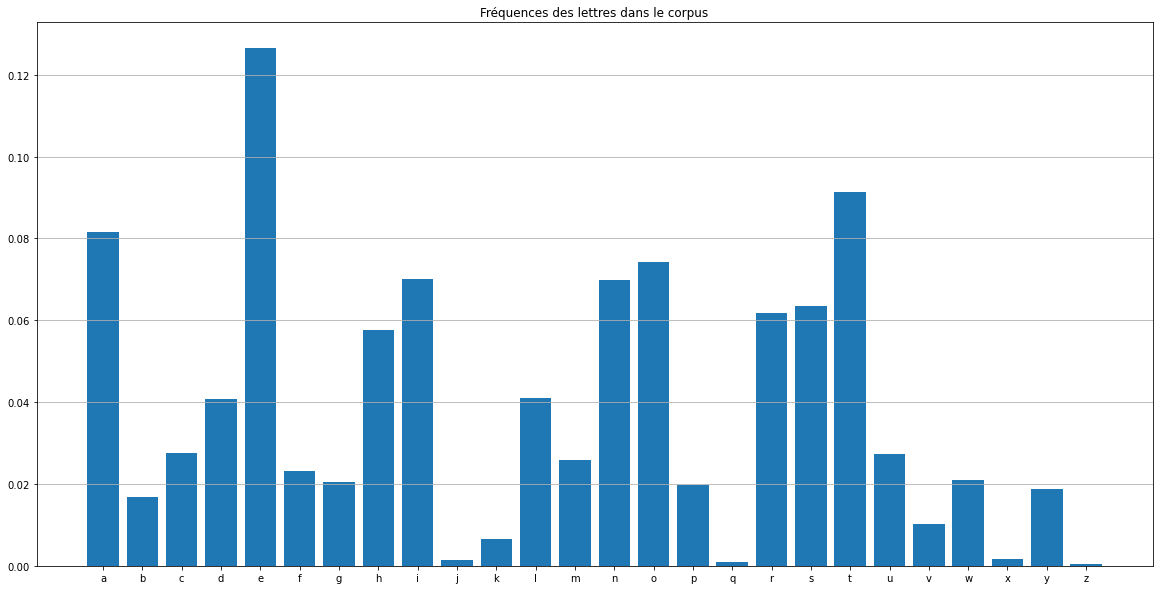

In [37]:
#PROPOSITION DB : ajouter la grille horizontal pour la lecture 

from functools import reduce

alphabet_start = labels.index('a')

alphabet_labels = labels[alphabet_start:]
alphabet_counts = counts[alphabet_start:]
total_alphabet_occurences = reduce(lambda a, b: a + b,  alphabet_counts)

plt.figure(figsize=(20,10))
plt.title("Fréquences des lettres dans le corpus")
plt.bar(alphabet_labels, [count / total_alphabet_occurences for count in alphabet_counts])
plt.grid(axis='y')
plt.show()

Cette distribution peut être mise en paralèlle avec la distribution des lettres dans la langue anglaise. 

En effet, notre objectif étant de créer une reconnaissance de caractères, plus notre modèle aura l'habtiude de traiter des lettres fréquentes correctement, meilleures seront nos chances de réussite, à defaut d'avoir un dataset plus conséquent.

Or, les fréquences des lettres anglaises semblent bien concordées avec la distribution de notre corpus. Le corpus est donc bien représentatif.

<img src="../imgs/english_letter_distribution.png" />

Source: https://www3.nd.edu/~busiforc/handouts/cryptography/letterfrequencies.html

''

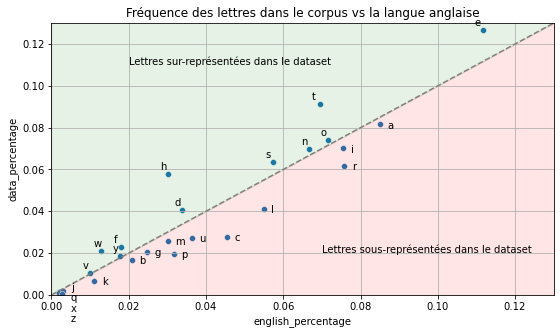

In [38]:
# PROPOSITION DB : Faire un plot plus stylé pour transmettre cette conclusion

df_alphabet = pd.DataFrame(list(zip(alphabet_labels,alphabet_counts)), columns = ['label','data_count'])
df_alphabet['data_percentage'] = df_alphabet['data_count'] / df_alphabet['data_count'].sum()

english_labels = ['E','A','R','I','O','T','N','S','L','C','U','D','P','M','H','G','B','F','Y','W','K','V','X','Z','J','Q']
english_counts= [0.111607,0.084966,0.075809,0.075448,0.071635,0.069509,0.066544,0.057351,0.054893,0.045388,0.036308,0.033844,0.031671,0.030129,0.030034,0.024705,0.02072,0.018121,0.017779,0.012899,0.011016,0.010074,0.002902,0.002722,0.001965,0.001962]

df_alphabet_english = pd.DataFrame(list(zip(english_labels,english_counts)), columns =['label', 'english_percentage'])
df_alphabet_english.label = df_alphabet_english.label.apply(lambda x: x.lower())

df_alphabet = df_alphabet.merge(right = df_alphabet_english, on='label')


plt.figure(figsize = (9,5))
sns.scatterplot(data=df_alphabet, x='english_percentage', y='data_percentage')
plt.title('Fréquence des lettres dans le corpus vs la langue anglaise')
plt.plot([0,.14],[0,.14], ls='--', color='gray')
plt.xlim(0,.13)
plt.ylim(0,.13)
plt.grid()

j=0

for i in range(len(df_alphabet)):
    if df_alphabet.data_percentage.iloc[i] < .005:
        plt.text(x = .005, y=.002 - j * .005,s = df_alphabet.label.iloc[i])
        j+=1
    elif df_alphabet.data_percentage.iloc[i] >= df_alphabet.english_percentage.iloc[i]:
        plt.text(x = (df_alphabet.english_percentage.iloc[i] - .002), y=(df_alphabet.data_percentage.iloc[i] + .002), s = df_alphabet.label.iloc[i])
    else :
        plt.text(x = (df_alphabet.english_percentage.iloc[i] + .002), y=(df_alphabet.data_percentage.iloc[i] - .002), s = df_alphabet.label.iloc[i])


plt.fill_between(x=[0,.14], y1=[0,0], y2=[0,.14],alpha = .1, color='red')
plt.fill_between(x=[0,.14], y1=[0,.14], y2=[.14,.14],alpha = .1, color='green')

plt.text(x=.07, y=.02,s='Lettres sous-représentées dans le dataset');
plt.text(x=.02,y=.11,s='Lettres sur-représentées dans le dataset');



On peut par contre se demander comment réagirait notre modèle à une autre langue dont la répartition des lettres serait différente.

### Analyse des contours des images avec un opérateur Laplacian

''

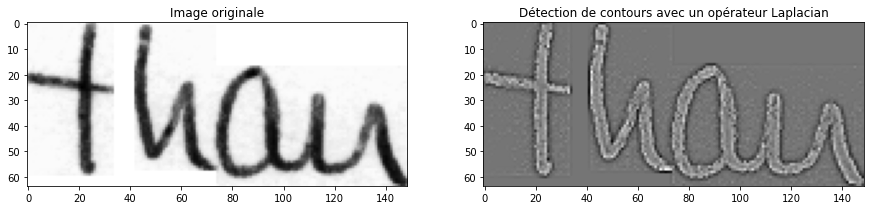

In [39]:
# PROPOSITION DB : Exploration de la détection de contours avec l'opérateur Laplacian
# La cellule fonctionne en état. Mais je ne sais pas si on va extraire des informations utiles pour le premier module

from scipy import ndimage, misc

fig = plt.figure(figsize =(15,5))
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

rand_index = np.random.randint(0, df.shape[0],1)

image = plt.imread(get_word_image_path_by_word_id(df.word_id.iloc[rand_index[0]]))  
plt.imshow(image, cmap='gray')
result = ndimage.laplace(image)
ax1.imshow(image, cmap='gray')
ax1.set_title('Image originale')
ax2.set_title('Détection de contours avec un opérateur Laplacian')
ax2.imshow(result, cmap='gray')
;


## Répartition des tags

In [ ]:
#plt.figure(figsize=(20,10))
#sns.countplot(x='tag', data=df)
df.tag.value_counts()

## Position des boîtes

```
file n06-128.png
```

Output:
`n06-128.png: PNG image data, 2479 x 3542, 8-bit grayscale, non-interlaced`


In [ ]:
print(df['x'].max())
print(df['y'].max())

In [ ]:
%%time

def show_text_position_over_dataset():
    arr = np.zeros((3542, 2479))
    for index, row in df.iterrows():
        x = row.x
        y = row.y
        arr[y][x] += 1
        for i in range(row.h):
            for j in range(row.w):
                arr[y + i][x + j] += 1

    plt.figure(figsize=(20,10))
    plt.imshow(arr);

# Need ten minutes to run
show_text_position_over_dataset()

<img src="../imgs/text_box_position.png">

# TODO


- check influence of grayscale over the results ? 
- check influence of rotation on segmentation

### Idées DB :
* analyser les mots les plus fréquents
* analyser la relation entre la bounding box et le nombre de catactères
* Laplacien de l'image, détection de contours 